# Problem Statement:

A prominent retail chain in Nigeria faces challenges in understanding the profitability of products across different stores. As the company plans to expand into more cities, it needs to identify which products yield higher profits at specific stores and how store characteristics such as location, size, and type influence profitability. 

# Aim of the Project:

The aim of this project is to develop a predictive model that estimates the profit returns for each product at different stores within the retail chain. By analyzing product-level and store-level features, the model will provide insights into which products and store characteristics drive higher profitability. 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import joblib

# Importing the data

In [2]:
# Load CSV data
data = pd.read_csv(r'C:\Users\Aya\Downloads\Python\CapStone\BLOSSOM ACADEMY CAPSTONE PROJECT TOPICS\Retail Stores Project\Data.csv')

# Data Preprocessing:

Filled missing values for Item_Weight and Store_Size using mean imputation. One-hot encoded categorical variables (Item_Type, Store_Location_Type, Store_Type). Standardized numerical features (Item_Weight, Item_Sugar_Content, Item_Visibility, Item_Price, Store_Start_Year, Store_Size).

In [3]:
# Display the first few rows of the dataframe
print(data.head())


  Item_ID      Store_ID       Item_Store_ID  Item_Weight Item_Sugar_Content  \
0   DRA12  BABATUNJI010  DRA12_BABATUNJI010         11.6          Low Sugar   
1   DRA12  BABATUNJI013  DRA12_BABATUNJI013         11.6          Low Sugar   
2   DRA12  BABATUNJI017  DRA12_BABATUNJI017         11.6          Low Sugar   
3   DRA12  BABATUNJI018  DRA12_BABATUNJI018         11.6          Low Sugar   
4   DRA12  BABATUNJI035  DRA12_BABATUNJI035         11.6    Ultra Low Sugar   

   Item_Visibility    Item_Type  Item_Price  Store_Start_Year Store_Size  \
0         0.068535  Soft Drinks      357.54              2005        NaN   
1         0.040912  Soft Drinks      355.79              1994       High   
2         0.041178  Soft Drinks      350.79              2014        NaN   
3         0.041113  Soft Drinks      355.04              2016     Medium   
4         0.000000  Soft Drinks      354.79              2011      Small   

  Store_Location_Type         Store_Type  Item_Store_Returns  
0    

In [4]:
# Check for missing values
print(data.isnull().sum())

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64


In [5]:
# Fill missing values
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Store_Size'] = data['Store_Size'].fillna(data['Store_Size'].mode()[0])

In [6]:
data.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [7]:
# Remove unnecessary columns
data = data.drop(columns=['Item_ID', 'Store_ID','Item_Store_ID', 'Item_Sugar_Content', 'Item_Weight','Store_Start_Year', 'Item_Weight'])

In [8]:
# Separate features and target variable
X = data.drop(columns=['Item_Store_Returns'])
y = data['Item_Store_Returns']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
# Define the column transformer with OneHotEncoder for categorical features and StandardScaler for numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [11]:
#Transform the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Model Training:
Used a RandomForestRegressor within a pipeline for preprocessing and model training. Split data into 80% training and 20% testing sets.

In [12]:
# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1000, random_state=42))
])

In [13]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Item_Visibility', 'Item_Price'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=1000, random_state=42))])

In [14]:
# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Model Evaluation:

Evaluated model performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 Score.

In [15]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training R^2: {r2_train}')
print(f'Testing R^2: {r2_test}')

Training MSE: 1297072.7123471699
Testing MSE: 9179175.213157171
Training R^2: 0.9343456308831029
Testing R^2: 0.5386248297415496


# Model Saving:

Saved the trained model as product_profitability_model.pkl using joblib.

In [16]:
# Save the model
joblib.dump(pipeline, 'retail_profitability_model.pkl')

['retail_profitability_model.pkl']

# Visualization

## Correlation Matrix

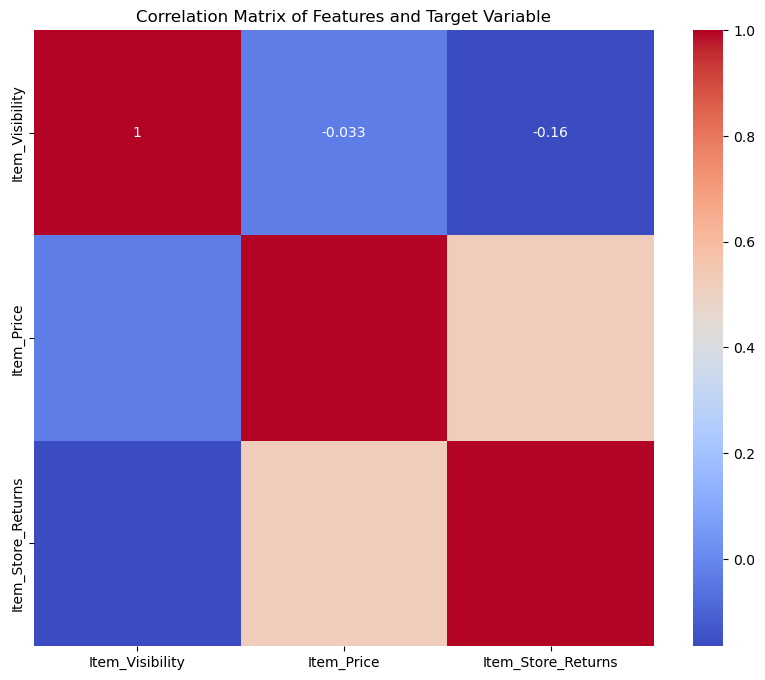

In [17]:
# Exclude non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

## Learning Curve

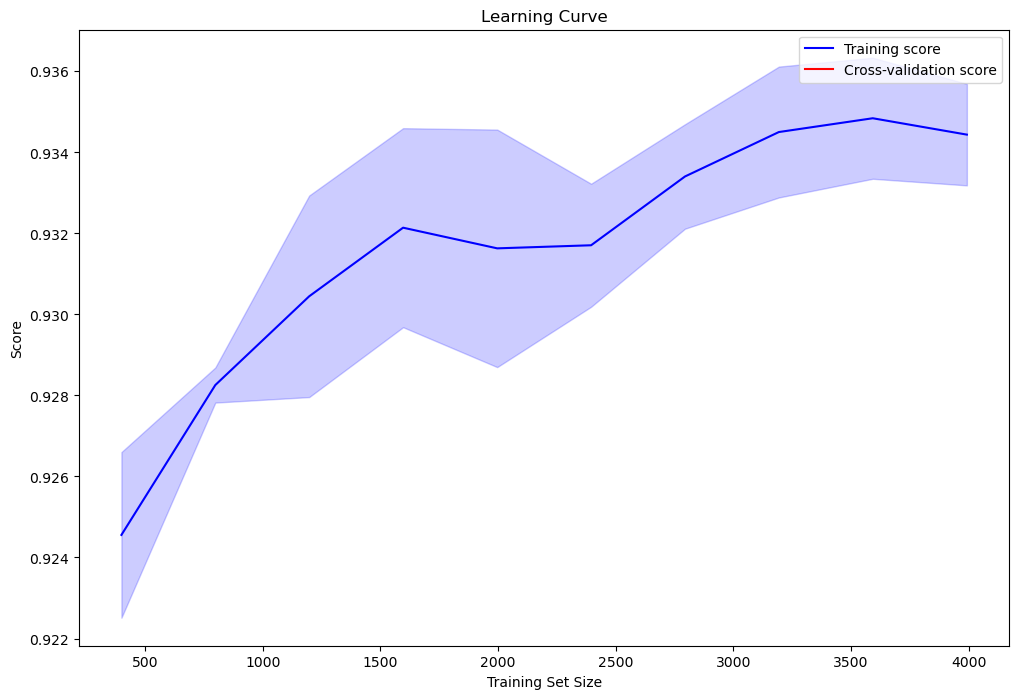

In [18]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

## Prediction vs. Actual Values Plot

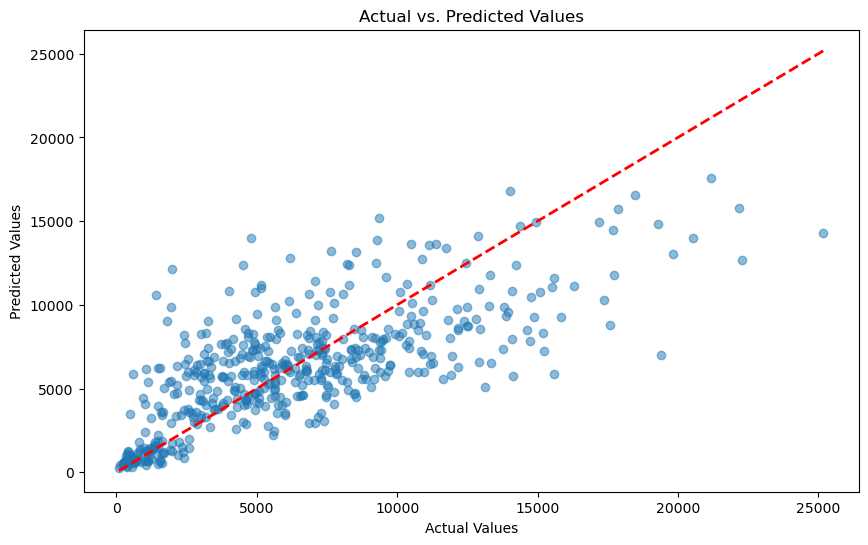

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()